<center>
## Exploratory Data Analysis  and Prediction of Reason for rejection of quotations and sales orders at the Enterprise
<center>Author: Mikhail Burinov (@burmish)

Firstly, we read into DataFrame our dataset for Reason for rejection of quotations and sales orders at the Enterprise:

In [70]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

In [71]:
df = pd.read_csv('rejection/rfr.csv',sep=';',thousands=".", decimal=",")
md = pd.read_csv('rejection/REASON_REJ.csv',sep=';')

Let's print the shape of the loaded dataframe and examine the features we are given.

In [72]:
df.head(15)

,Sales document,Partner Function,Item,Item.1,Billing document,R,Reason for rejection,Reason for order,Condition,Incoterms,Created on,Actual Invoiced Quan,Bill.quan.stock unit,Base Unit,Sales unit,Document c,Net priceSO,Net valueSO,Condition pric. unit,CumConfirmedQty,Base Unit.1,Invoice created,Invoice created by,Billing doc. date,Billing status,Payment condition,Order unit,Document c.1,Net valueB,Confirmed qty.,Material,Customer,Division,Sales Organization,Shipping conditions,Distribution Channel,Plant,Sold-to party,Schedule line date,Billing type,Sales doc. type
0,3411848,SH,10,10.0,163002241.0,NaN,NaN,NaN,M3,DAP,2012015,140.0,140.0,M3,M3,EUR,23.90,3346.00,1,140,M3,15012015.0,SYS-BTC-FI,15012015.0,NaN,I108,M3,EUR,3346.00,140,134409,22983,99,NL05,70,1,NL01,22983,7012015,ZF4,ZOR1
1,3411848,SP,10,10.0,163002241.0,NaN,NaN,NaN,M3,DAP,2012015,140.0,140.0,M3,M3,EUR,23.90,3346.00,1,140,M3,15012015.0,SYS-BTC-FI,15012015.0,NaN,I108,M3,EUR,3346.00,140,134409,22983,99,NL05,70,1,NL01,22983,7012015,ZF4,ZOR1
2,3411850,SH,10,10.0,163002227.0,NaN,NaN,NaN,M3,DAP,2012015,120.0,120.0,M3,M3,EUR,23.90,2868.00,1,120,M3,15012015.0,SYS-BTC-FI,15012015.0,NaN,I011,M3,EUR,2868.00,120,134409,22290,99,NL05,70,1,NL01,22290,7012015,ZF4,ZOR1
3,3411850,SP,10,10.0,163002227.0,NaN,NaN,NaN,M3,DAP,2012015,120.0,120.0,M3,M3,EUR,23.90,2868.00,1,120,M3,15012015.0,SYS-BTC-FI,15012015.0,NaN,I011,M3,EUR,2868.00,120,134409,22290,99,NL05,70,1,NL01,22290,7012015,ZF4,ZOR1
4,3411851,SH,10,10.0,163002240.0,NaN,NaN,NaN,M3,DAP,2012015,280.0,280.0,M3,M3,EUR,23.90,6692.00,1,280,M3,15012015.0,SYS-BTC-FI,15012015.0,NaN,I011,M3,EUR,6692.00,280,134409,22938,99,NL05,70,1,NL01,22938,7012015,ZF4,ZOR1
5,3411851,SP,10,10.0,163002240.0,NaN,NaN,NaN,M3,DAP,2012015,280.0,280.0,M3,M3,EUR,23.90,6692.00,1,280,M3,15012015.0,SYS-BTC-FI,15012015.0,NaN,I011,M3,EUR,6692.00,280,134409,22938,99,NL05,70,1,NL01,22938,7012015,ZF4,ZOR1
6,3412466,SH,10,10.0,162001604.0,NaN,NaN,NaN,PAK,FCA,5012015,4824.0,402.0,PAK,ST,EUR,10.80,4341.60,1,402,PAK,13012015.0,ARKAR,13012015.0,NaN,N014,ST,PLN,12606.72,4824,52599,28984,99,NL05,2,1,PL13,28984,14012015,ZIV,ZOR
7,3412466,SH,10,10.0,163001643.0,NaN,NaN,NaN,PAK,FCA,5012015,4824.0,402.0,PAK,ST,EUR,10.80,4341.60,1,402,PAK,13012015.0,ARKAR,13012015.0,NaN,N014,ST,EUR,4341.60,4824,52599,28984,99,NL05,2,1,PL13,28984,14012015,ZF2,ZOR
8,3412466,SP,10,10.0,162001604.0,NaN,NaN,NaN,PAK,FCA,5012015,4824.0,402.0,PAK,ST,EUR,10.80,4341.60,1,402,PAK,13012015.0,ARKAR,13012015.0,NaN,N014,ST,PLN,12606.72,4824,52599,28984,99,NL05,2,1,PL13,28984,14012015,ZIV,ZOR
9,3412466,SP,10,10.0,163001643.0,NaN,NaN,NaN,PAK,FCA,5012015,4824.0,402.0,PAK,ST,EUR,10.80,4341.60,1,402,PAK,13012015.0,ARKAR,13012015.0,NaN,N014,ST,EUR,4341.60,4824,52599,28984,99,NL05,2,1,PL13,28984,14012015,ZF2,ZOR


Let's have a look at the features and make sure that we don't have absence rows.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
Sales document          20000 non-null int64
Partner Function        20000 non-null object
Item                    20000 non-null int64
Item.1                  19626 non-null float64
Billing document        19626 non-null float64
R                       0 non-null float64
Reason for rejection    1290 non-null float64
Reason for order        0 non-null float64
Condition               20000 non-null object
Incoterms               20000 non-null object
Created on              20000 non-null int64
Actual Invoiced Quan    19626 non-null float64
Bill.quan.stock unit    19626 non-null float64
Base Unit               19626 non-null object
Sales unit              19626 non-null object
Document c              20000 non-null object
Net priceSO             20000 non-null float64
Net valueSO             20000 non-null float64
Condition pric. unit    20000 non-null int64
CumConfirmedQty      

We notice 3 empty features: "R", "Reason for order ", "Billing status". Let's get rid of them. 

In [74]:
df=df.drop( ['R', 'Reason for order', 'Billing status'], axis=1)


Now let's look at the target feature distribution - Reason for rejection of quotations and sales orders

Features description

|  Name  | Description | Type |
|---         |--:       |     |
| **Sales Document** | id of Sales order | categorical |
| **Partner Function** | Partner function allows you to identify which functions a partner has to perform in any business process| categorica |
| **Item ** |Item number inside Sales order | categorical  |
| **Item.1  ** | Item number for billing document |categorical |
| **Billing document  ** | id of Billing document | categorical |
| **Incoterms ** | internationally-recognized terms of delivery reflecting the standards set by the International Chamber of Commerce (ICC) | categorical|
| **Created on** | Date on which the record was created |numeric  |
| **Actual Invoiced Quan ** | Actual Invoiced Quantity of the product | numeric |
| **Bill.quan.stock unit** | Billing quantity in stockkeeping unit | numeric |
| **Base Unit  ** | Base Units of measurements | categorical |
| **Sales unit ** | Sales units of mesurements | categorical |
| **Document c    ** | Currency | categorical |
| **Net priceSO ** | Net price | numeric |
| **Net valueSO ** | Net value of the order item in document currency | numeric |
| **Condition pric. unit** | Condition pricing unit |  categorical |
| **CumConfirmedQty** | Cumulative confirmed quantity in base unit | numeric |
| **Base Unit.1** |Cumulative quantity Unit |  categorical |
| **Invoice created** | Invoice creation date |  numeric|
| **Invoice created by ** | User name who created invoice | categorical |
| **Billing doc. date** | Date of creation of Billing Documnt | numeric |
| **Payment condition  ** | Payment condition |  categorical |
| **Order unit ** | Order unit |  categorical |
| **Document c.1 ** | Document currency for net value |  categorical|
| **Net valueB ** |Net Value of Billing Item in Document Currency | numeric |
| **Confirmed qty** | Confirmed quantity | numeric|
| **Material ** | id of material|  categorical |
| **Customer** | id of customer |  categorical|
| **Division** | Division |  categorical |
| **Sales Organization ** | Sales organization | categorical |
| **Shipping conditions** | Shipping conditions|  categorical|
| **Distribution Channel** | Distribution Channel |  categorical |
| **Plant ** | Plant|  categorical |
| **Sold-to party** | the customer who is going to place the order to the business |  categorical |
| **Schedule line date ** | Schedule line date |  categorical|
| **Billing type** | Billing type|  categorical |
| **Sales doc. type ** | Sales doc. type |  categorical|

Our target feature: **Reason for rejection** – categorical feature. Later we will build the model that will predict the values of this feature. 

Let's explore our target feature

In [75]:
df['Reason for rejection'].value_counts()

52.0    682
14.0    210
11.0    192
4.0     182
15.0      8
10.0      6
1.0       4
0.0       2
3.0       2
12.0      2
Name: Reason for rejection, dtype: int64

We also have a master data text for Reason for rejection code. Here wecan see that Reason for rejection'55' stands for 'non conform delivery' or '14' means 'Customer decision'

In [76]:
md

,Reason for rejection,L,Medium Description
0,0,E,Assigned by the System (Internal)
1,1,E,Delivery date too late
2,2,E,Poor quality
3,3,E,Too expensive
4,4,E,Competitor better
5,5,E,Guarantee
6,10,E,Unreasonable request
7,11,E,Cust.to receive replacement
8,12,E,Sales decision
9,13,E,Financial decision


Let's visualize the distribution of Reason for rejection of quotations and sales orders

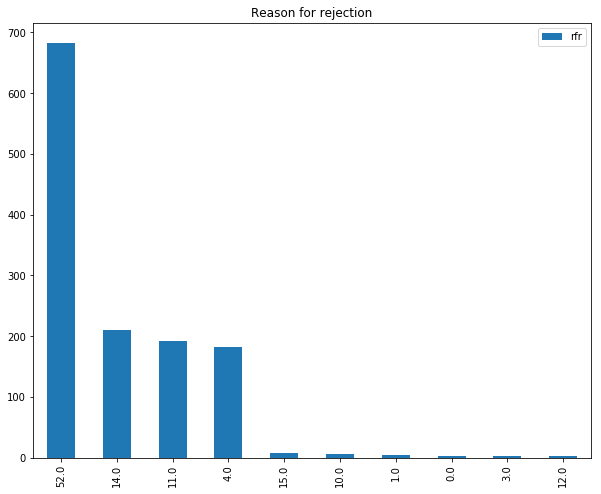

In [77]:
df['Reason for rejection'].value_counts().plot(kind='bar', label='rfr')
plt.legend()
plt.title('Reason for rejection');

For our business purposes it's crucial to predict weather the Sales order was rejected or not. So we will replace value for Reason for rejection from 1 to 52 to 1, and all NaNs will be equal to zero.

In [78]:
df['Reason for rejection'].fillna(0, inplace = True)
df.loc[df['Reason for rejection'] > 0, 'Reason for rejection'] = 1

In [85]:
df['Reason for rejection'].mean()

0.0644

6 % of rejected orders out of total number of orders is quite good value. The enterprise can have a good profit out of non-rejected Sales orders. 

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales document,20000.0,3.580156e+06,1.063872e+05,3411848.0,3.475630e+06,3.594218e+06,3.680858e+06,3748526.0
Item,20000.0,2.364360e+01,2.736454e+01,10.0,1.000000e+01,1.000000e+01,3.000000e+01,280.0
Item.1,19626.0,2.466371e+01,2.792090e+01,1.0,1.000000e+01,1.100000e+01,3.000000e+01,280.0
Billing document,19626.0,1.538915e+08,2.159377e+07,95418210.0,1.620266e+08,1.630156e+08,1.630315e+08,163154533.0
Reason for rejection,20000.0,6.440000e-02,2.454703e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0
Created on,20000.0,1.539558e+07,8.363689e+06,1042015.0,8.774515e+06,1.602202e+07,2.206202e+07,31032015.0
Actual Invoiced Quan,19626.0,3.570768e+04,1.480173e+05,-1612800.0,1.440000e+03,5.040000e+03,1.469700e+04,3564000.0
Bill.quan.stock unit,19626.0,4.064496e+02,1.956208e+03,-14112.0,8.000000e+00,3.000000e+01,9.600000e+01,53856.0
Net priceSO,20000.0,2.777444e+04,2.394349e+05,0.0,6.915000e+00,4.540000e+01,1.463700e+02,4876630.0
Net valueSO,20000.0,3.477760e+04,1.518130e+05,0.0,1.485120e+03,4.842240e+03,1.105000e+04,2398219.0


From the describe table above we can see that feature 'Distribution channel','Division','Sales Organization' has the constant values. 
I assume that the dataset was created for one distribution chanel, Division of Sales Organizatoin of the enterprise. This will not be helpful for  our classifier. Let's get rid of this features. 


In [80]:
df=df.drop( ['Distribution Channel','Sales Organization','Division'], axis=1)


Let's explore the number of unique values by features  in the dataset

In [81]:
feats_counts =df.nunique(dropna = False)
feats_counts.sort_values()

Sales doc. type            2
Partner Function           2
Reason for rejection       2
Plant                      6
Order unit                 7
Incoterms                  7
Document c                 7
Document c.1               8
Sales unit                 8
Base Unit.1                9
Condition                  9
Base Unit                 10
Condition pric. unit      11
Billing type              13
Shipping conditions       18
Item                      31
Invoice created by        54
Payment condition         67
Item.1                   131
Created on               134
Invoice created          261
Billing doc. date        277
Schedule line date       279
CumConfirmedQty          459
Sold-to party            488
Bill.quan.stock unit     581
Material                1033
Customer                1095
Confirmed qty.          1349
Actual Invoiced Quan    1451
Net priceSO             1756
Sales document          3028
Net valueSO             3613
Billing document        5727
Net valueB    

We can see that there is no feature with only 1 unique value. 

Let' see the correlation of numeric features

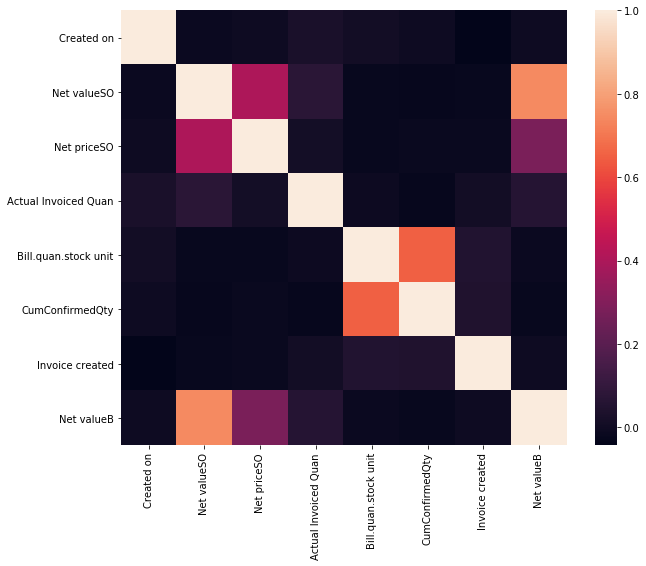

In [82]:
corr_matrix = df[['Created on', 'Net valueSO','Net priceSO','Actual Invoiced Quan', 'Bill.quan.stock unit','CumConfirmedQty','Invoice created','Net valueB']].corr()
sns.heatmap(corr_matrix);

Now let's look at the distribution of all numeric features. Here we use logarithmic scale

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2F997EBE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E2F97BA748>]], dtype=object)

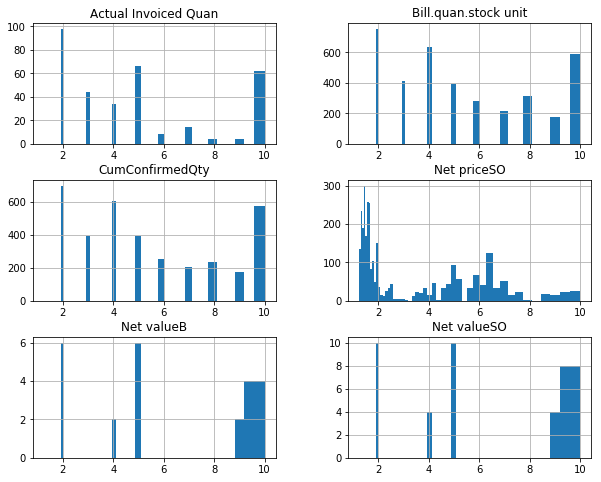

In [86]:
features = list( set(['Net valueSO','Net priceSO','Actual Invoiced Quan', 'Bill.quan.stock unit','CumConfirmedQty','Net valueB']))

df[features].hist(bins=np.logspace(0.1, 1.0, 50))

In [87]:
#sns.pairplot(df[features + ['Reason for rejection']], hue='Reason for rejection');